# Practica #4 Wine

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from keras.utils import to_categorical
from keras.layers import LeakyReLU

In [3]:
#Leer el archivo
df = pd.read_csv("wine.csv")
df.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Labels
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#Separar variables de los objetivos Altos y Ancho, objetivos valores 0 y 1 de la (última columna)
x = df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13']].values
y = df['Labels'].values

# Normalizar los datos
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Convertir las etiquetas a formato de valores enteros
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [5]:
#Dividir conjunto de datos 1. Probar y 2. Entrenar
from sklearn.model_selection import train_test_split

y = to_categorical(y, num_classes=3)  # Asumiendo que las clases son 0, 1 y 2


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 13) (142, 3)
(36, 13) (36, 3)


In [6]:
#Crear el (M O D E L O) PERCEPTRON SIMPLE
# Crear el modelo de red neuronal con una neurona en la capa de salida
model = keras.Sequential([
    keras.layers.Dense(875, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(175, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
])


print(model.summary())

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 875)               12250     
                                                                 
 dropout (Dropout)           (None, 875)               0         
                                                                 
 dense_1 (Dense)             (None, 175)               153300    
                                                                 
 dropout_1 (Dropout)         (None, 175)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 528       
                                                                 
Total params: 166,078
Trainable params: 166,078
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
#Entrenaar el modelo
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=22, batch_size=22, validation_split=0.2, callbacks=[early_stopping])




Epoch 1/22
6/6 [==============================] - 2s 80ms/step - loss: 0.9268 - accuracy: 0.7434 - val_loss: 0.8151 - val_accuracy: 0.9655
Epoch 2/22
6/6 [==============================] - 0s 17ms/step - loss: 0.7433 - accuracy: 0.9115 - val_loss: 0.6773 - val_accuracy: 0.9655
Epoch 3/22
6/6 [==============================] - 0s 11ms/step - loss: 0.6192 - accuracy: 0.9027 - val_loss: 0.5665 - val_accuracy: 1.0000
Epoch 4/22
6/6 [==============================] - 0s 12ms/step - loss: 0.4997 - accuracy: 0.9646 - val_loss: 0.4782 - val_accuracy: 1.0000
Epoch 5/22
6/6 [==============================] - 0s 12ms/step - loss: 0.4334 - accuracy: 0.9823 - val_loss: 0.4037 - val_accuracy: 1.0000
Epoch 6/22
6/6 [==============================] - 0s 12ms/step - loss: 0.3538 - accuracy: 0.9823 - val_loss: 0.3461 - val_accuracy: 1.0000
Epoch 7/22
6/6 [==============================] - 0s 12ms/step - loss: 0.3131 - accuracy: 0.9735 - val_loss: 0.3013 - val_accuracy: 1.0000
Epoch 8/22
6/6 [===========

In [8]:
#Ver los resultados
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 0s 6ms/step - loss: 0.1518 - accuracy: 0.9444
[0.1517830789089203, 0.9444444179534912]


In [9]:
sample = X_test[0:1]  # Obtener la primera muestra del conjunto de prueba
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)  # Obtener la clase con la mayor probabilidad
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 136ms/step
Predicted class: 1


In [10]:
print(y_test [4]== prediction)

[[False False False]]


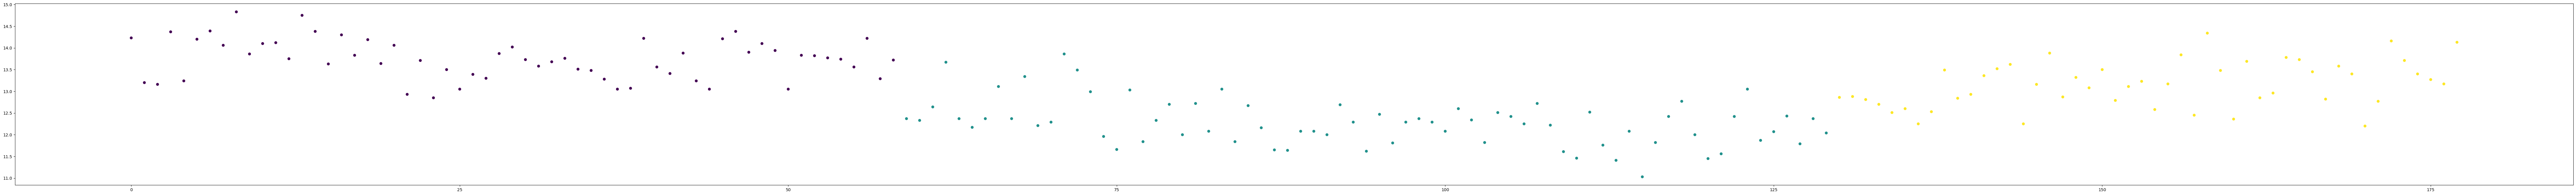

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=[112,8])
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,
            c= df.iloc[:,-1].values)
plt.show()

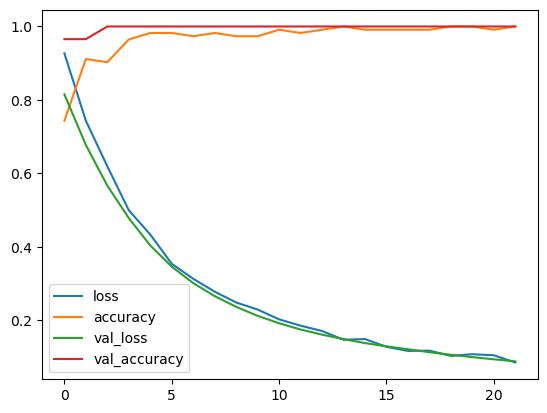

In [12]:
values=pd.DataFrame(history.history)
values.plot()
plt.show()